### Preparing input data for a model to differentiate between noise, muons and electrons

In this notebook, we prepare the input data that will be feeded to a convolutional neural network to classify a signal as electron, muon or noise. So first of all, we wil get all the electron files from the `cropped_images` directory and we will separate this array into two: one for the energy and the other one for the noise. And then, we will wet the muon files from the `cropped_muons` directory and we will proceed similary.

In [1]:
import glob
import os, shutil
import numpy as np

First we need to pad the energy images of the electrons to the maximum window of muons:

In [4]:
original_dataset_dir = '/gpfs/projects/damic/CCDimg/'

In [5]:
base_dir = '/gpfs/projects/damic/electrons_padded'
os.mkdir(base_dir)

In [6]:
window_x, window_y = 286, 296

#this function will be only applied to the energy of the particle, not the noise
def padding_energy(array):
    
    y, x = window_y, window_x  #y,x is the size of the maximum window
    y_image = array.shape[0]
    x_image = array.shape[1]
    
    if y-y_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    elif x-x_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    else:
        #generating random numbers to pad the energy image
        random1 = np.random.randint(0, y-y_image)
        random2 = np.random.randint(0, x-x_image)
    
        #padding
        reshaped = np.pad(array, ((random1, y-y_image-random1), (random2, x-x_image-random2)),  constant_values=0)
    return reshaped

#this function will be applied to the noise of the signal to crop the image
def cropping_noise(array):
    
    y, x = window_y, window_x
    reshaped = array[0:window_y, 0:window_x]
    return reshaped

In [7]:
#reshaping both energy and noise images, so they can be the same size

#list of the files in the original dataset
files = os.listdir(original_dataset_dir)
print(len(files))
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(original_dataset_dir, files[index]))['energy'] 
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']
    
    #cropping energy images 
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located more on the left and more on the top
    y_max, x_max = coords.max(axis=0) #coordinates of the element located more on the right and more on the bottom
    energy_a = energy_a[y_min:y_max+1, x_min:x_max+1]
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(base_dir, file), energy=energy_a, noise=noise_a)
    print(index)

2673
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [8]:
#reshaping both energy and noise images, so they can be the same size, MUONS

path = '/gpfs/projects/damic/cropped_muons'
#list of the files in the original dataset
files = glob.glob1(path,"*_pdg_13.npz")

print(len(files))

#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(path, files[index]))['energy'] 
    noise_a = np.load(os.path.join(path, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(path, file), energy=energy_a, noise=noise_a)
    print(index)

801
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

Now both electron and muon images have the same shape, but let's check:

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Muon energy cropped')

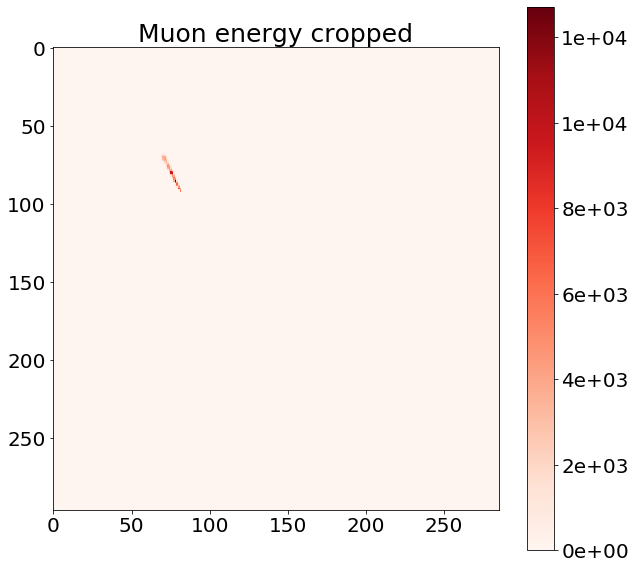

In [11]:
mu_c = os.listdir(path)
mu = np.load(os.path.join(path, mu_c[100]))['energy']
n = np.load(os.path.join(path, mu_c[100]))['noise']

fig_mu = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Muon energy cropped", fontsize = 25)

Text(0.5, 1.0, 'Electron energy cropped')

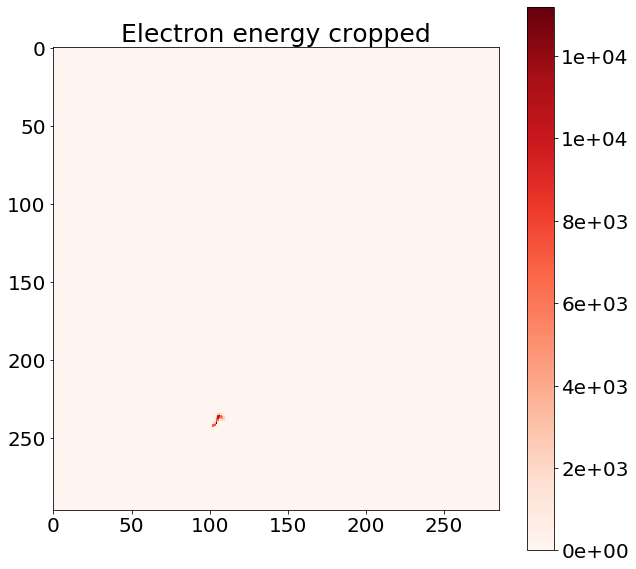

In [15]:
e_c = os.listdir(base_dir)
e = np.load(os.path.join(base_dir, e_c[100]))['energy']
n = np.load(os.path.join(base_dir, e_c[100]))['noise']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy cropped", fontsize = 25)

In [18]:
e.shape == (window_y, window_x)

True

Once the data is ready, we prepare it.

In [19]:
muons = glob.glob1(path,"*13.npz") #all the muons

len_mu = len(muons)

all_muon_energy = [np.load(os.path.join(path, muons[_]))['energy'] for _ in range(len_mu)]
all_muon_noise = [np.load(os.path.join(path, muons[_]))['noise'] for _ in range(len_mu)]

In [20]:
all_muon_energy_ = np.dstack(all_muon_energy)
all_muon_energy_ = np.rollaxis(all_muon_energy_,-1)

all_muon_noise_ = np.dstack(all_muon_noise)
all_muon_noise_ = np.rollaxis(all_muon_noise_, -1)

In [22]:
electrons = glob.glob1(base_dir,"*11.npz") #all the electrons

len_e = len(electrons)

all_e_energy = [np.load(os.path.join(base_dir, electrons[_]))['energy'] for _ in range(len_e)]
all_e_noise = [np.load(os.path.join(base_dir, electrons[_]))['noise'] for _ in range(len_e)]

all_e_energy_ = np.dstack(all_e_energy)
all_e_energy_ = np.rollaxis(all_e_energy_,-1)

all_e_noise_ = np.dstack(all_e_noise)
all_e_noise_ = np.rollaxis(all_e_noise_, -1)

In [24]:
#putting together all the noise
all_noise = np.concatenate((all_e_noise_, all_muon_noise_), axis=0) 

In [25]:
all_noise.shape

(3429, 296, 286)

In [27]:
all_e_energy_.shape

(2628, 296, 286)

In [28]:
all_muon_energy_.shape

(801, 296, 286)

We create the labels:
* 0 for noise
* 1 for electron
* 2 for muon

In [30]:
labels_electron = np.repeat(1, all_e_energy_.shape[0])
labels_muon = np.repeat(2, all_muon_energy_.shape[0])
labels_noise = np.repeat(0, all_noise.shape[0])

In [31]:
X = np.concatenate((all_e_energy_, all_muon_energy_, all_noise), axis=0) #energy followed by noise
y = np.concatenate((labels_electron, labels_muon, labels_noise), axis=0) #energy labels followed by noise labels

In [32]:
print("%f gb of data+labels" % ((X.size * X.itemsize + y.size * y.itemsize) *10**(-9)))

4.644622 gb of data+labels


As we cant run the model in altamira, we will save `X` and `y` as npz files:

In [33]:
np.savez_compressed('/gpfs/projects/damic/eVSmuVSn_1', data=X, labels=y)